# Creating a realistic recording site from a rat cortex column - Helmstaedter

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math

from collections import namedtuple
Channel = namedtuple("Channel", ["id", "pos", "type"])
Neuron = namedtuple("Neuron", ["id", "pos", "btype", "mtype", "layer"])
Layer = namedtuple("Layer", ["id", "name", "height", "volume", "total_count", "total_density", "in_ratio", 
                             "layer_density_distributions"])

## 1.  Building and visualizing a rat Somatosensory cortex column object

In [2]:
from ERSS.regions.cortex.CortexColumn import Column
from ERSS.regions.cortex.rat_data.CortexDataDicts import createHelmstaedterRatSomatosensoryCortexDataDict

#Random seed for reproducibility
np.random.seed(2)

#Import rat somatosensory cortex column dict from the Helmstaedter papers
rat_somatosensory_cortex_data_dict = createHelmstaedterRatSomatosensoryCortexDataDict()
'''
Create new column using the given cortex dict, a user defined radius, and a 
min distance (microns) enforced between neurons (takes a couple of minutes due to min_dist being set to 15)
'''
column = Column(rat_somatosensory_cortex_data_dict, radius=210.0, min_neuron_dist=10)

Building density/depth distributions...
... distributions built!
Building layers...
... layers built!
Filling layers with neurons...
...Filling layer L1 with 43 neurons...
...Filling layer L2 with 2121 neurons...
...Filling layer L3 with 3186 neurons...
...Filling layer L4 with 3472 neurons...
...Filling layer L5A with 2050 neurons...
...Filling layer L5B with 2265 neurons...
...Filling layer L6A with 3610 neurons...
...Filling layer L6B with 1009 neurons...
... all layers filled!


In [3]:
print(rat_somatosensory_cortex_data_dict)

{'Std': {'layers': ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B'], 'in_ratios': [9.5, 2.4, 1.1, 0.5, 4.1, 2.1, 0.9, 0.6], 'densities': [2.7, 11.2, 6.5, 6.3, 4.1, 3.8, 0.9, 3.8], 'heights': [20, 21, 76, 31, 35, 1, 19, 16]}, 'majority_in_type': [None, None, None, None, None, None, None, None], 'majority_ex_type': [None, None, None, None, None, None, None, None], 'Mean': {'layers': ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B'], 'in_ratios': [84.3, 17, 9, 8.1, 19.9, 16.2, 8.9, 8.4], 'densities': [6.6, 86.4, 101.6, 123.9, 54.4, 59.8, 92.3, 42], 'heights': [75, 171, 272, 263, 234, 274, 300, 185]}}


In [4]:
#Layer information is stored in a layer DataFrame

print(column.getLayers())

   id region      height  radius    volume  neuron_count     density  \
0   0     L1   39.131288   210.0  0.005421            43    8.055457   
1   1     L2  205.445687   210.0  0.028463          2121   74.550935   
2   2     L3  240.326404   210.0  0.033296          3186   95.691451   
3   3     L4  196.777921   210.0  0.027262          3472  127.374160   
4   4    L5A  232.030661   210.0  0.032147          2050   63.798053   
5   5    L5B  272.754712   210.0  0.037789          2265   59.957850   
6   6    L6A  284.006800   210.0  0.039348          3610   91.763456   
7   7    L6B  193.046103   210.0  0.026745          1009   37.751883   

    in_ratio                        layer_density_distributions  
0  84.118260  <scipy.stats._distn_infrastructure.rv_sample o...  
1  15.205110  <scipy.stats._distn_infrastructure.rv_sample o...  
2   8.034081  <scipy.stats._distn_infrastructure.rv_sample o...  
3   7.605610  <scipy.stats._distn_infrastructure.rv_sample o...  
4  24.717505  <scipy.

In [5]:
#Neuron information is stored in a neuron DataFrame

print(column.getNeurons())

          id                                                pos btype mtype  \
0          0  [24.454315233439985, 109.15868071610831, 4.891...    IN   N/A   
1          1  [-80.10666946211661, 108.99664644341543, 24.55...    IN   N/A   
2          2  [-3.126495712094844, -42.81943515995308, 27.05...    IN   N/A   
3          3  [87.59039164676444, -128.68851192381243, 38.33...    IN   N/A   
4          4  [-130.78392117355503, 124.0407640444504, 18.86...    IN   N/A   
5          5  [152.66999066840071, 51.97364498681252, 3.3940...    IN   N/A   
6          6  [-94.6142352810262, -54.112775350960334, 12.37...    IN   N/A   
7          7  [-46.652425602946906, 159.93221990001288, 2.09...    IN   N/A   
8          8  [-139.4684819661262, -3.506348758049226, 13.47...    IN   N/A   
9          9  [-119.88231779839127, -97.21458594370492, 25.6...    IN   N/A   
10        10  [153.62606834351843, -26.40372606507454, 20.26...    IN   N/A   
11        11  [64.3726037879161, -113.65743189166993

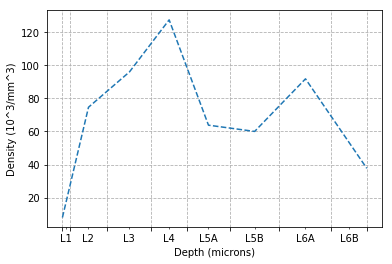

In [6]:
#Plot the density vs. depth distribution from which neurons were sampled

column.plotDensityDistribution()

Layer: L2
Radius: 210.0
Height: 205.44568697650476
Total Neurons: 2121
IN Neurons: 323
EX Neurons: 1798


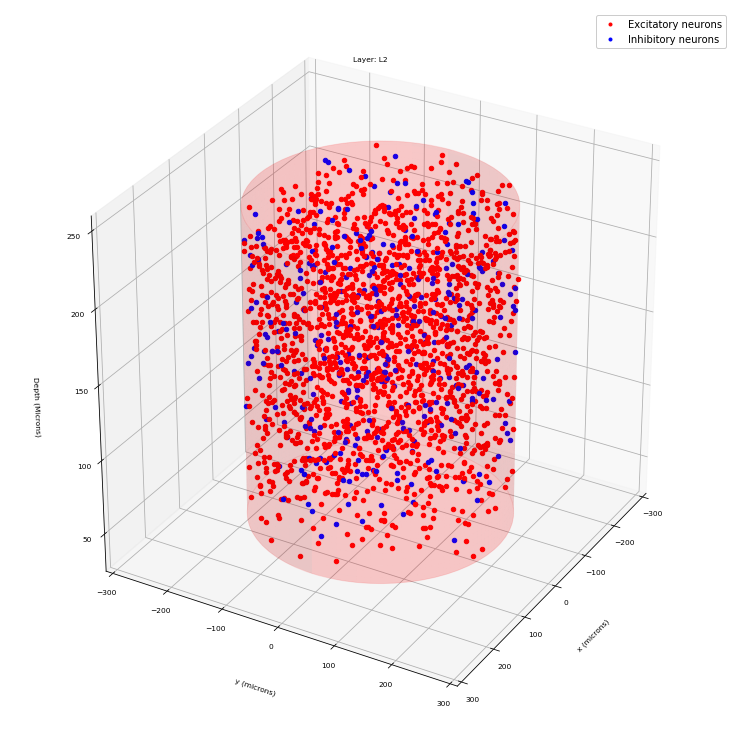

In [7]:
#Plot a layer from the cortex column
layer_id = 1
fig= plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotLayer(layer_id, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [39.13128829610274, 205.44568697650476, 240.32640359718422, 196.77792103427794, 232.03066104707847, 272.7547119133928, 284.0068000525321, 193.0461026745287]


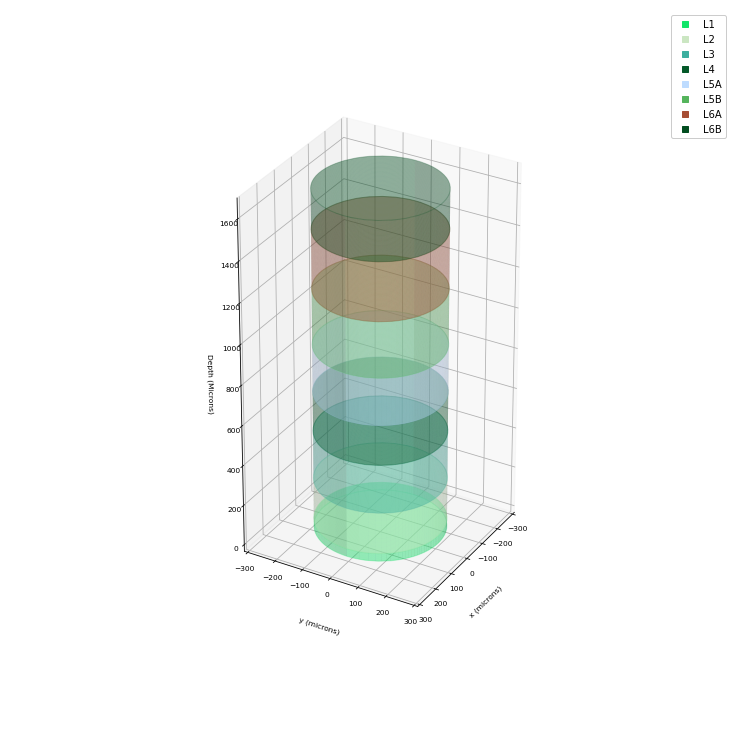

In [8]:
#Plot the entire column without any neurons to see the layer shapes
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=False, ax=ax)

In [9]:
print(column.depths)

[0, 39.13128829610274, 244.5769752726075, 484.9033788697917, 681.6812999040696, 913.7119609511481, 1186.466672864541, 1470.473472917073, 1663.5195755916016]


Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [39.13128829610274, 205.44568697650476, 240.32640359718422, 196.77792103427794, 232.03066104707847, 272.7547119133928, 284.0068000525321, 193.0461026745287]
Total Neurons: {'L6B': 1009, 'L5B': 2265, 'L5A': 2050, 'L4': 3472, 'L2': 2121, 'L3': 3186, 'L1': 43, 'L6A': 3610}
IN Neurons: {'L6B': 86, 'L5B': 367, 'L5A': 507, 'L4': 264, 'L2': 323, 'L3': 256, 'L1': 36, 'L6A': 316}
EX Neurons: {'L6B': 923, 'L5B': 1898, 'L5A': 1543, 'L4': 3208, 'L2': 1798, 'L3': 2930, 'L1': 7, 'L6A': 3294}


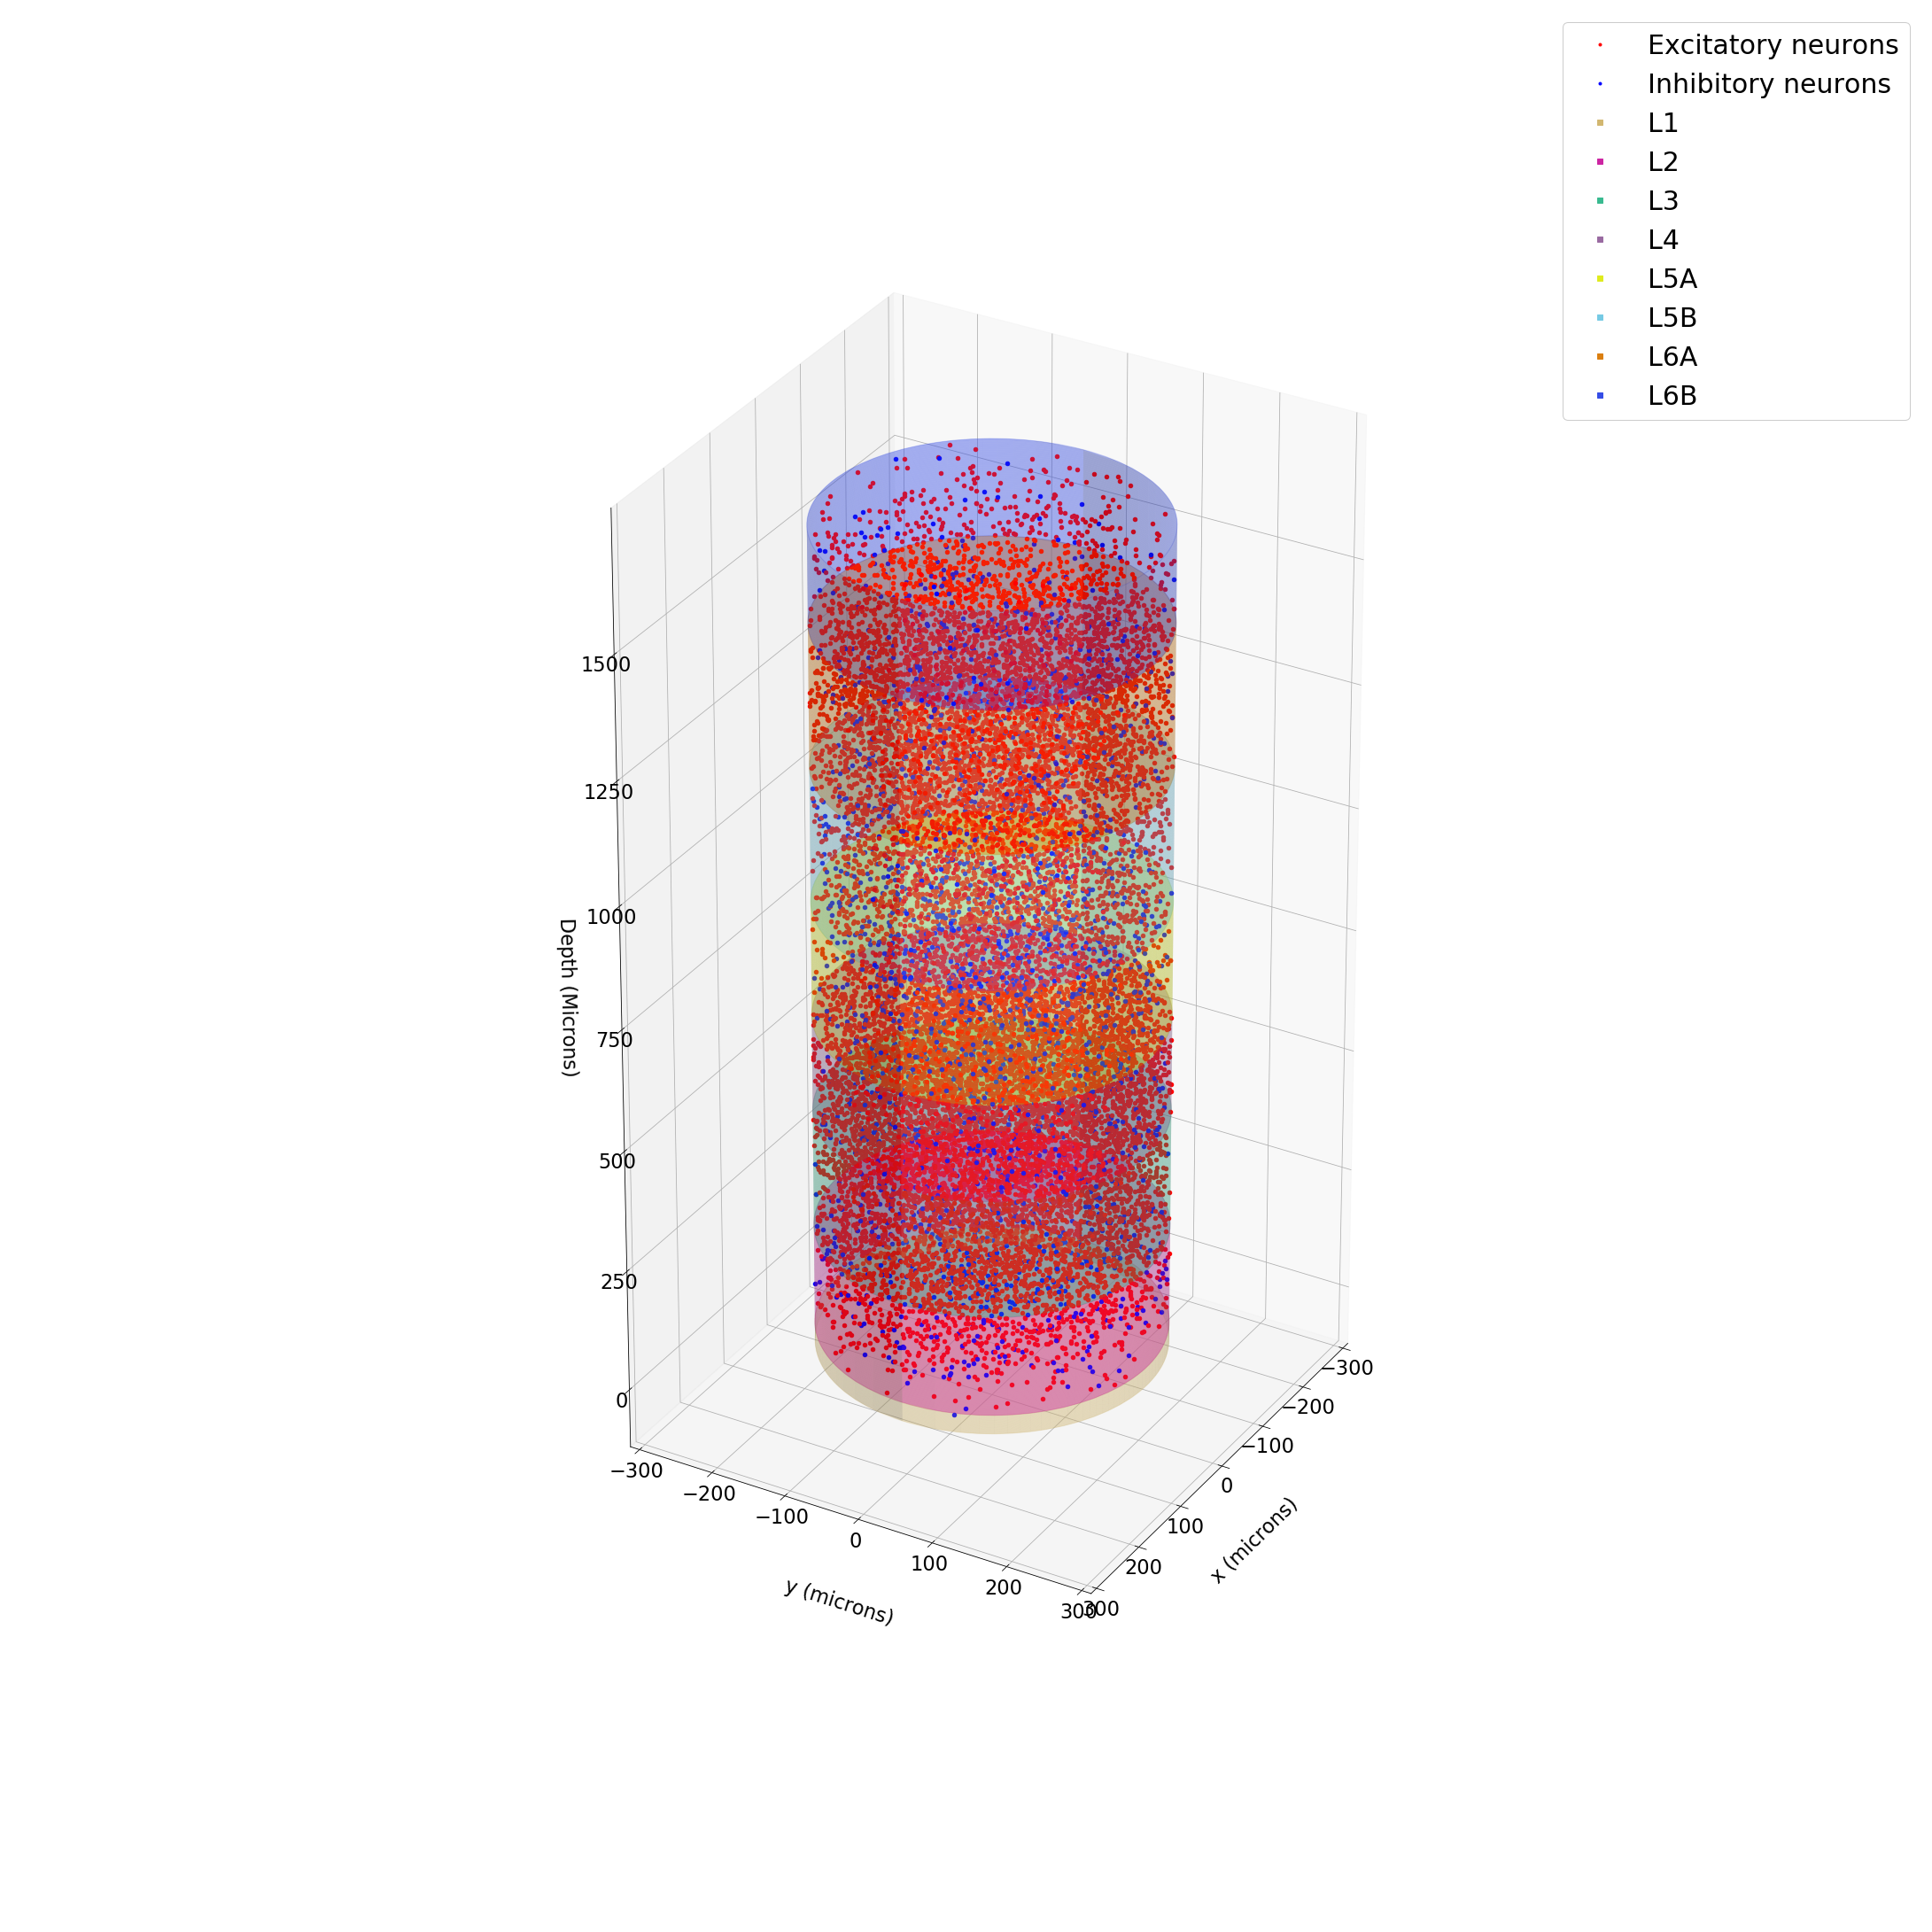

In [10]:
#Can plot the entire column with all neurons included (pretty slow, lots of neurons to be scattered)
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

column.plotColumn(plot_neurons=True, ax=ax)

## 2. Creating and using a Probe object (Neuropixels subclass)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [39.13128829610274, 205.44568697650476, 240.32640359718422, 196.77792103427794, 232.03066104707847, 272.7547119133928, 284.0068000525321, 193.0461026745287]


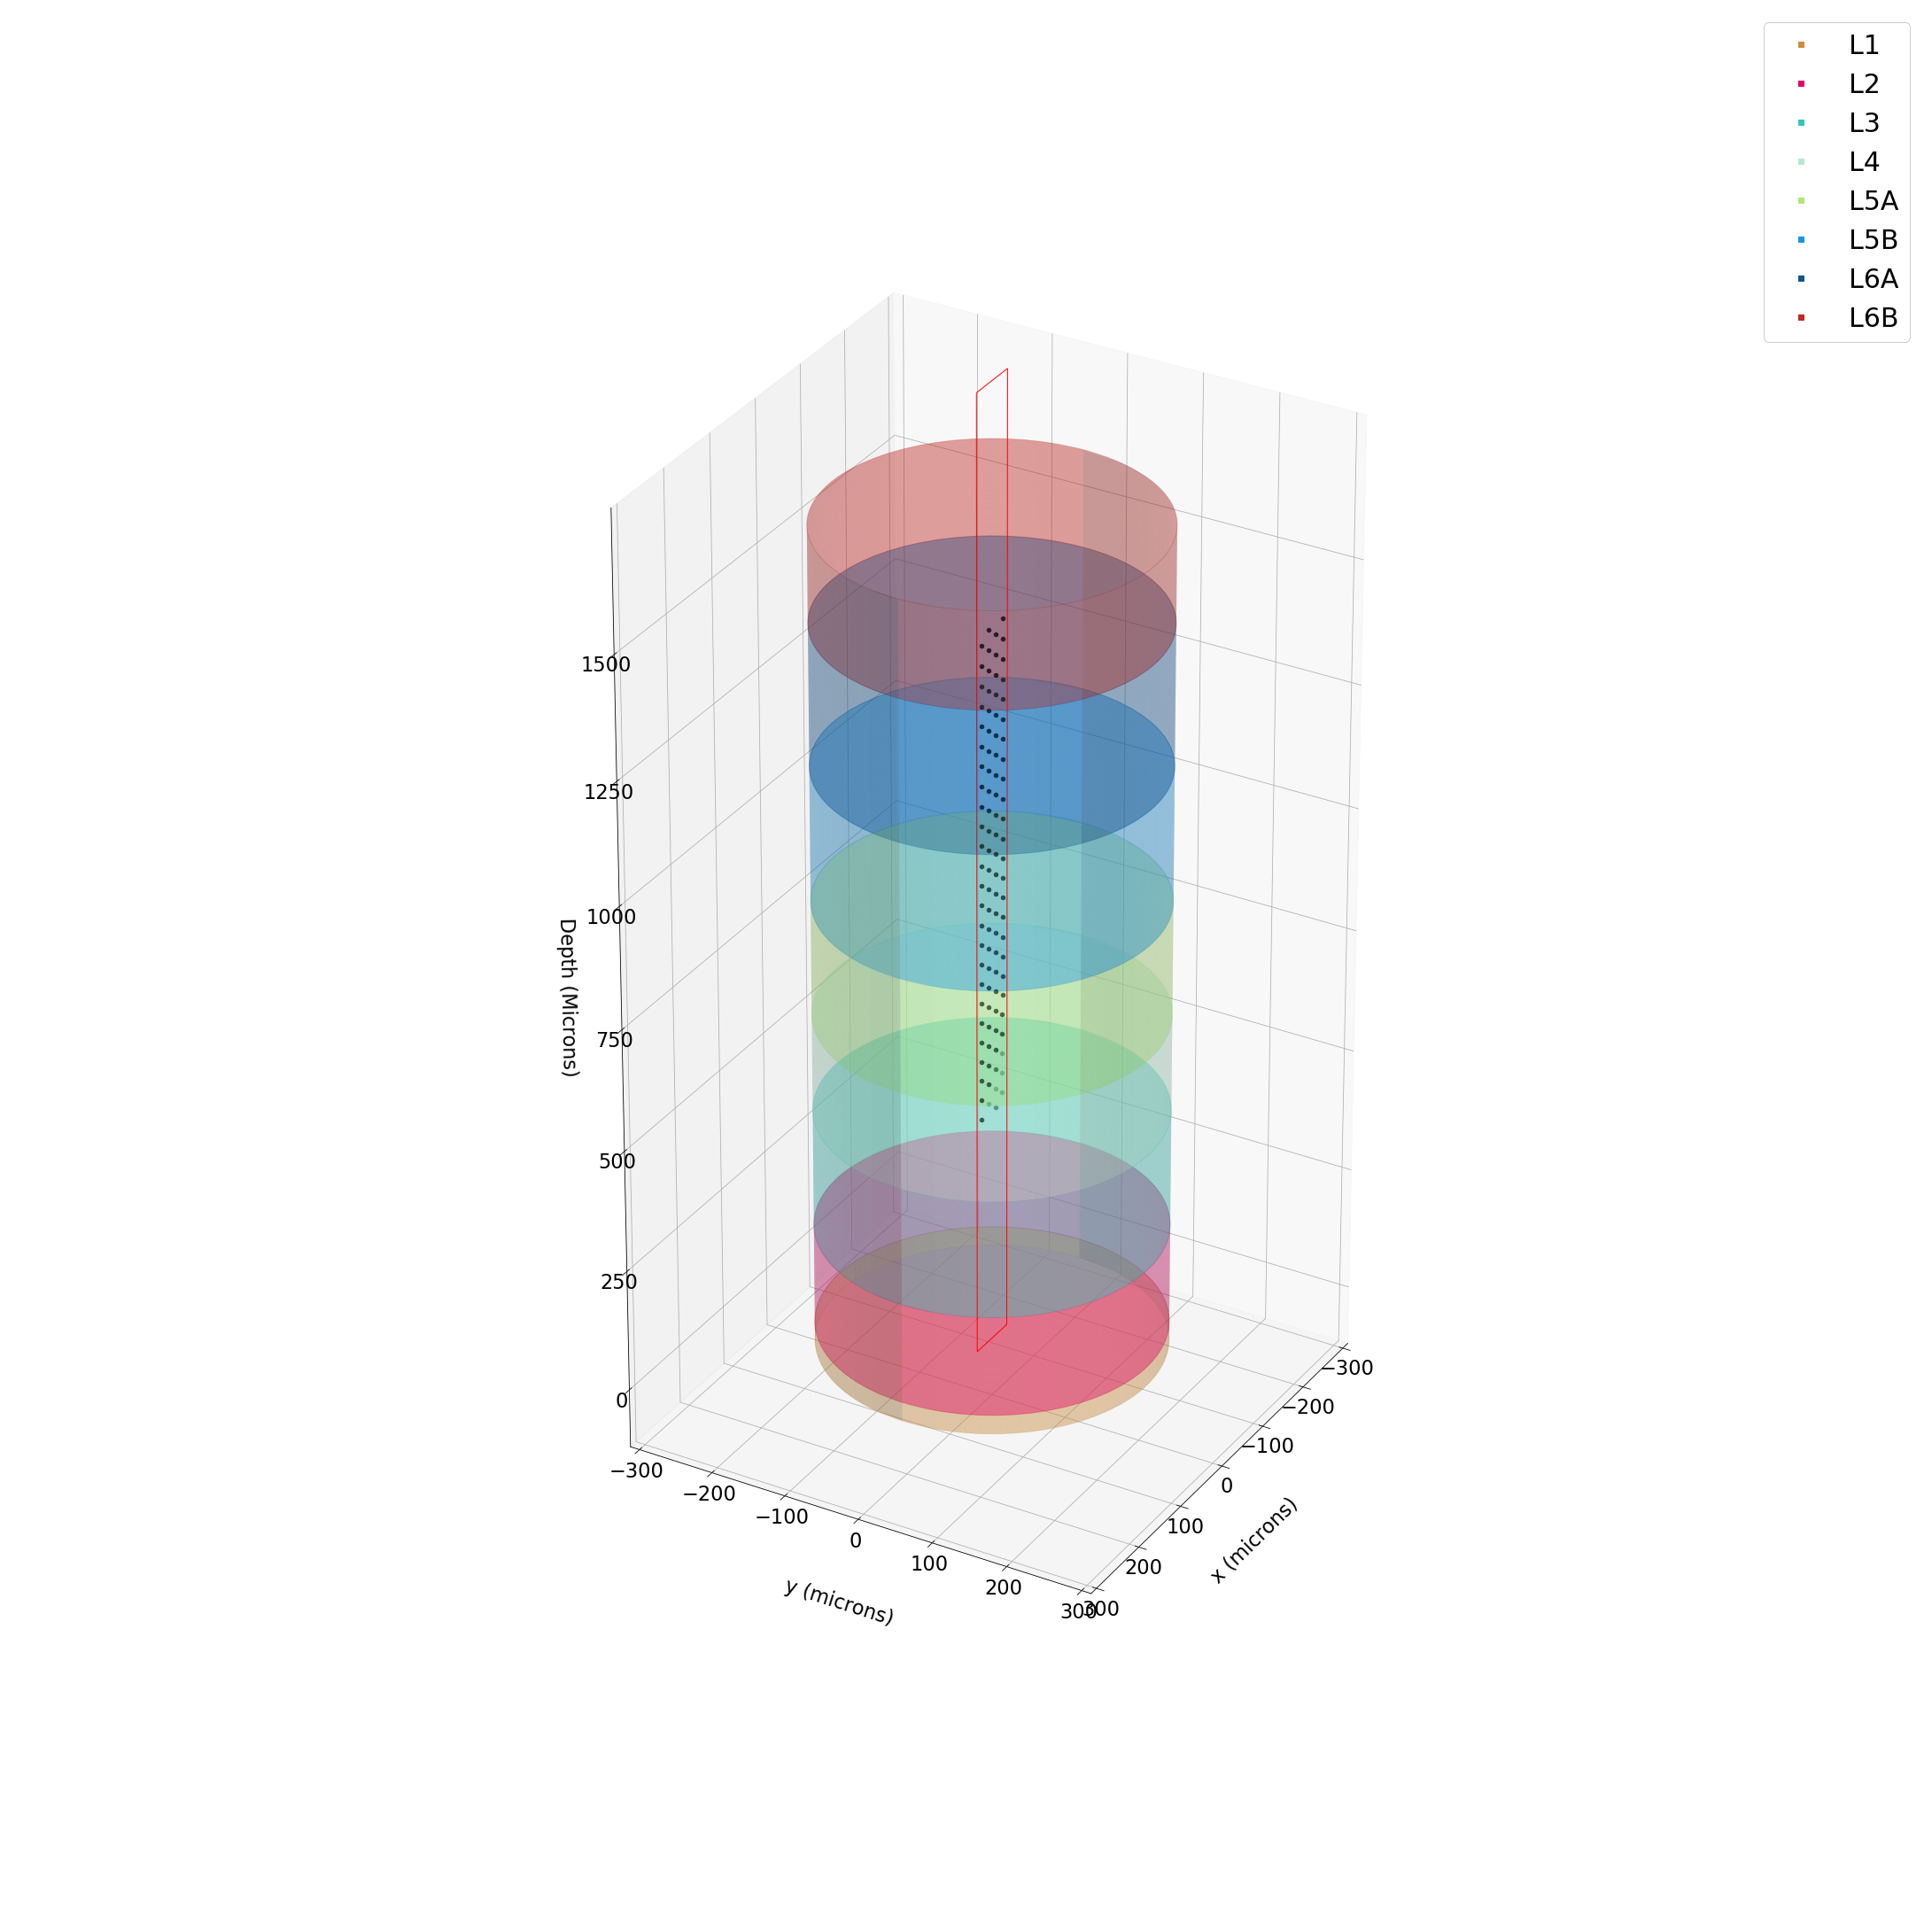

In [11]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#Import a probe object that is instantiated with a specified number of channels
from ERSS.probes.PremadeProbes import NeuropixelsProbe
probe = NeuropixelsProbe(num_channels = 192)

#Draw the probe, black channels are recording, orange channels are reference (can exclude channel ids from drawing)
excluded_channel_ids = range(46) + range(146, 192)
probe.draw(ax=ax, excluded_channel_ids=excluded_channel_ids)

#Plot the layers of the column to see how the probe interacts with the cortical region
column.plotColumn(plot_neurons=False, ax=ax)

Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [39.13128829610274, 205.44568697650476, 240.32640359718422, 196.77792103427794, 232.03066104707847, 272.7547119133928, 284.0068000525321, 193.0461026745287]


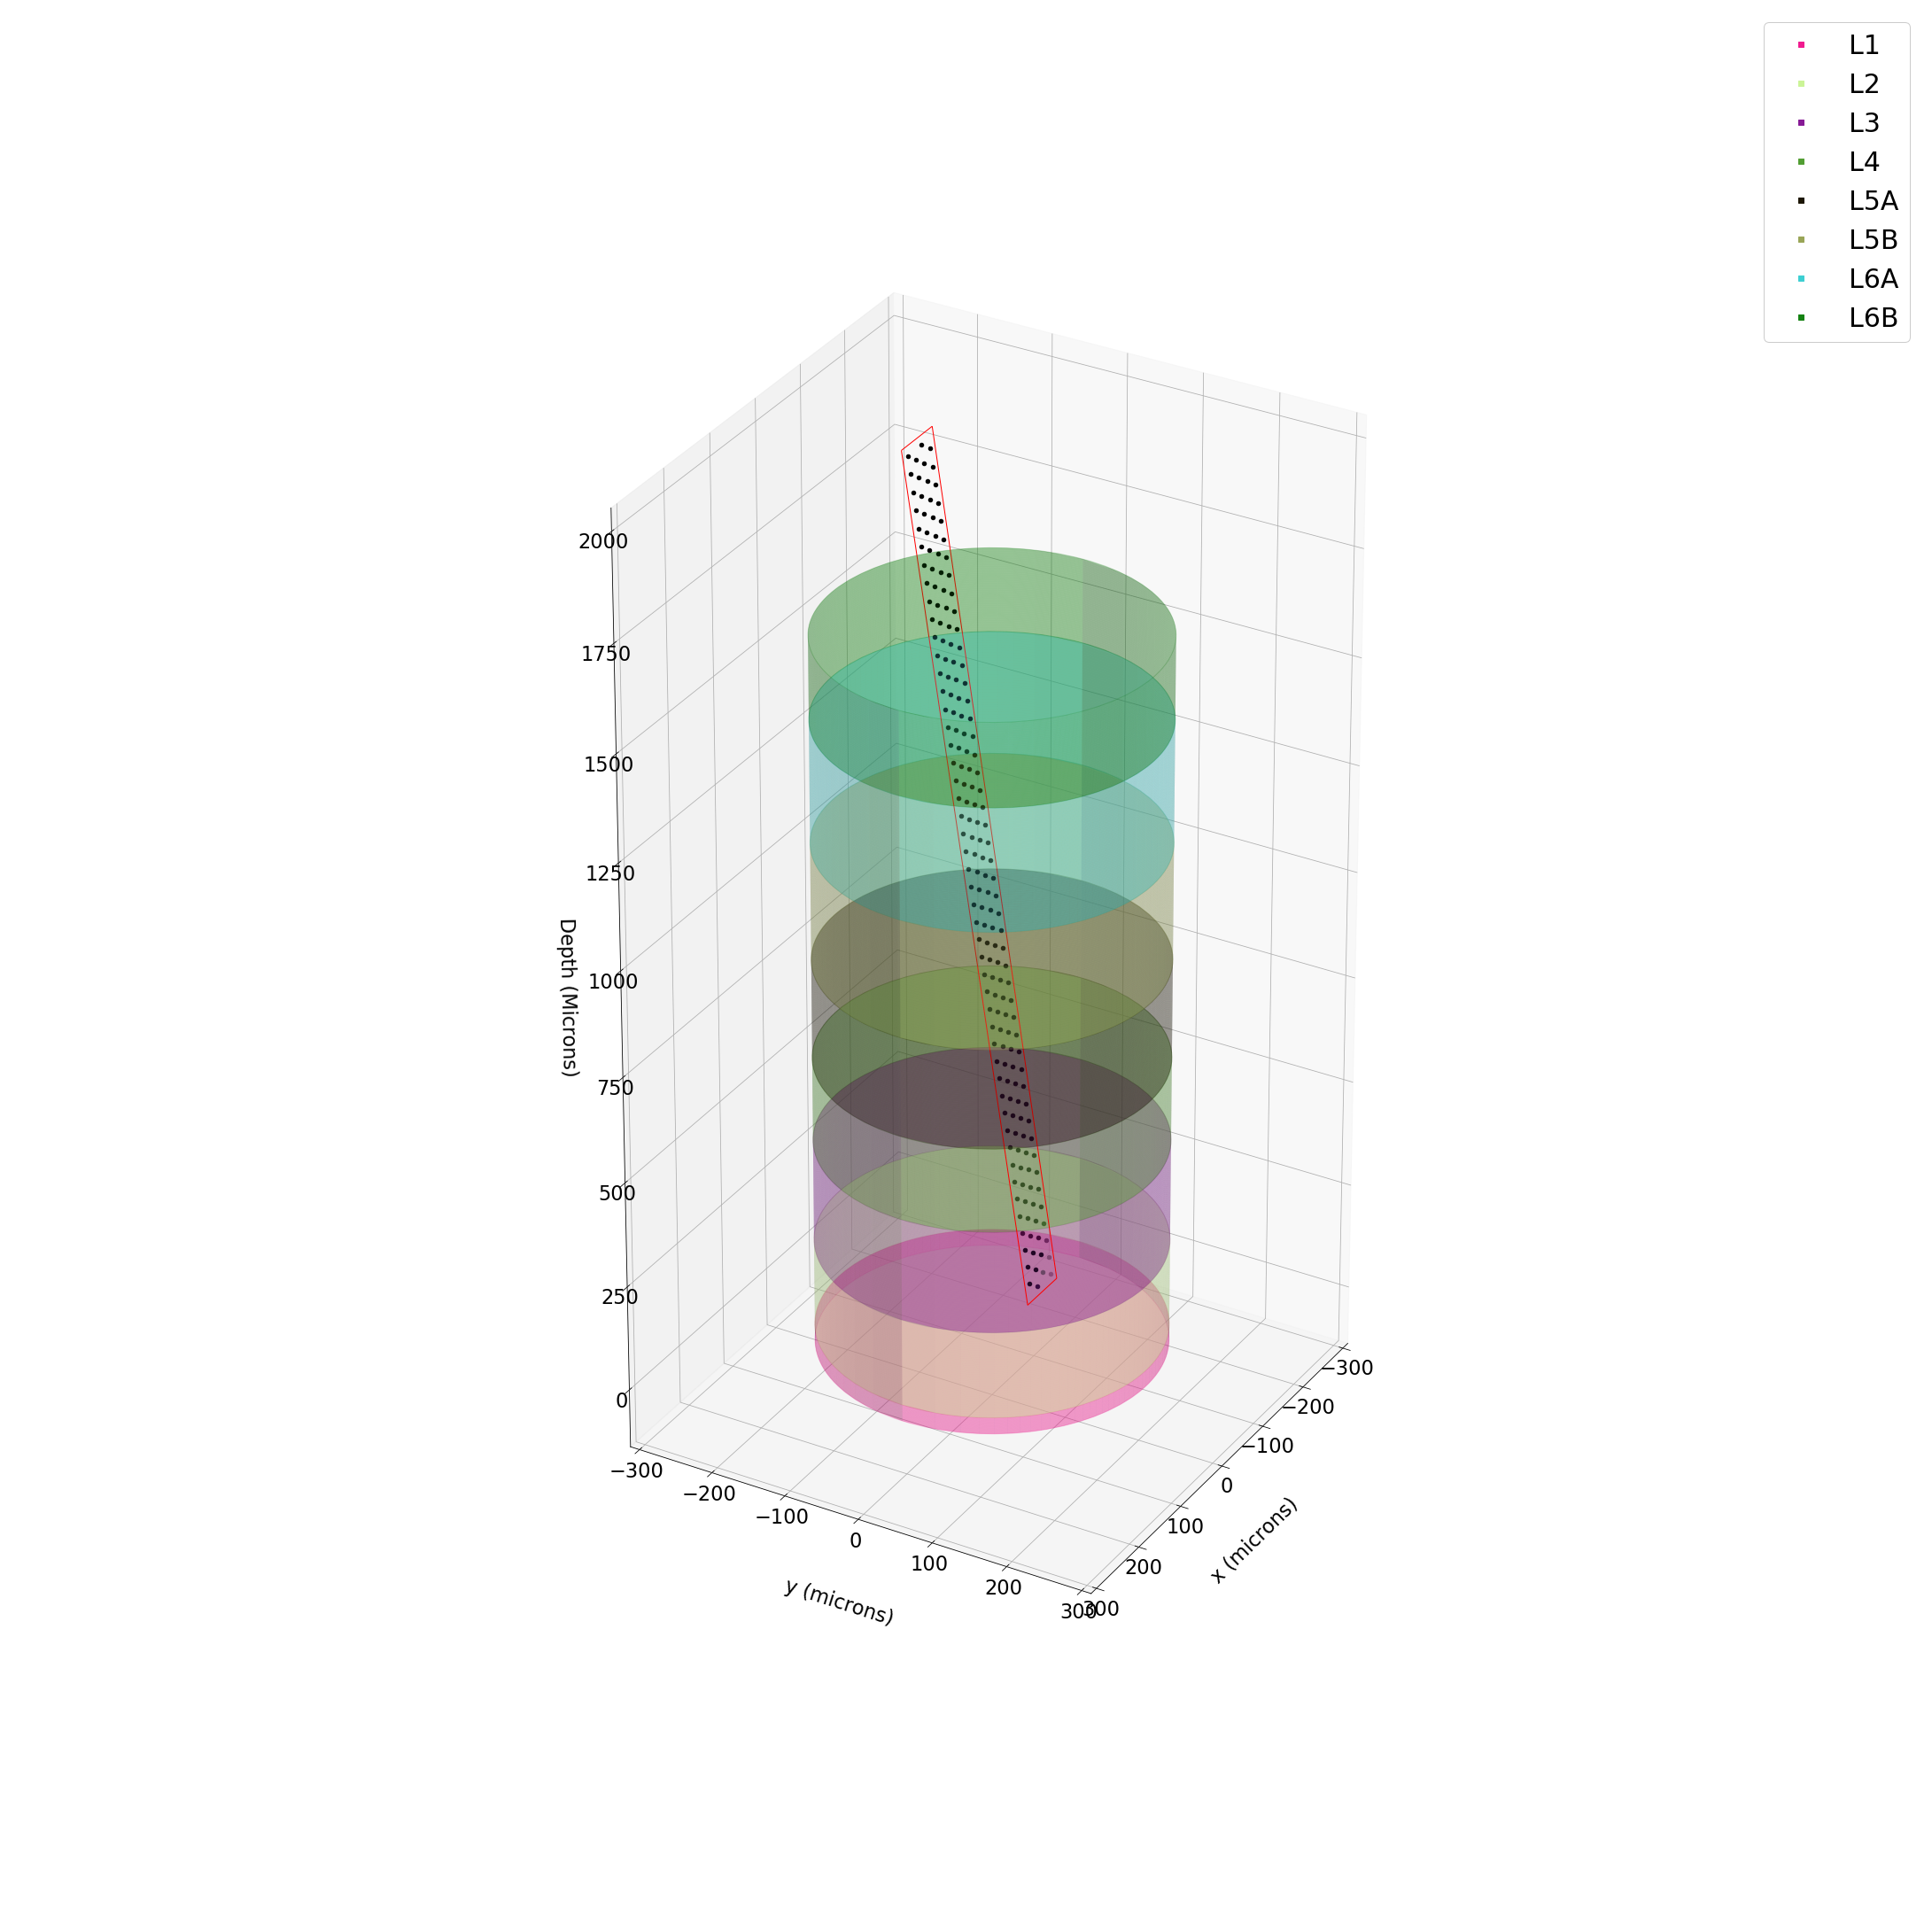

In [12]:
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)

#rotate the probe around the given axis counterclockwise with a given angle (radians). Plotting is optional
axis = np.asarray([1, 0, 0])
theta = math.pi/36 #radians
probe.rotate(theta, axis, ax=ax, plot=False)

#shift the probe in the direction of a given axis with a given distance. Plotting is optional
axis = np.asarray([1, 0, 0])
dist = -120 #microns
probe.shift(dist, axis, ax=ax, plot=True)


column.plotColumn(plot_neurons=False, ax=ax)

Num neurons: 2102
Layers: ['L1', 'L2', 'L3', 'L4', 'L5A', 'L5B', 'L6A', 'L6B']
Radii: [210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0, 210.0]
Heights: [39.13128829610274, 205.44568697650476, 240.32640359718422, 196.77792103427794, 232.03066104707847, 272.7547119133928, 284.0068000525321, 193.0461026745287]
Total Neurons: {'L6B': 33, 'L5B': 391, 'L5A': 366, 'L4': 634, 'L2': 0, 'L3': 157, 'L1': 0, 'L6A': 521}
IN Neurons: {'L6B': 2, 'L5B': 67, 'L5A': 82, 'L4': 54, 'L2': 0, 'L3': 14, 'L1': 0, 'L6A': 46}
EX Neurons: {'L6B': 31, 'L5B': 324, 'L5A': 284, 'L4': 580, 'L2': 0, 'L3': 143, 'L1': 0, 'L6A': 475}


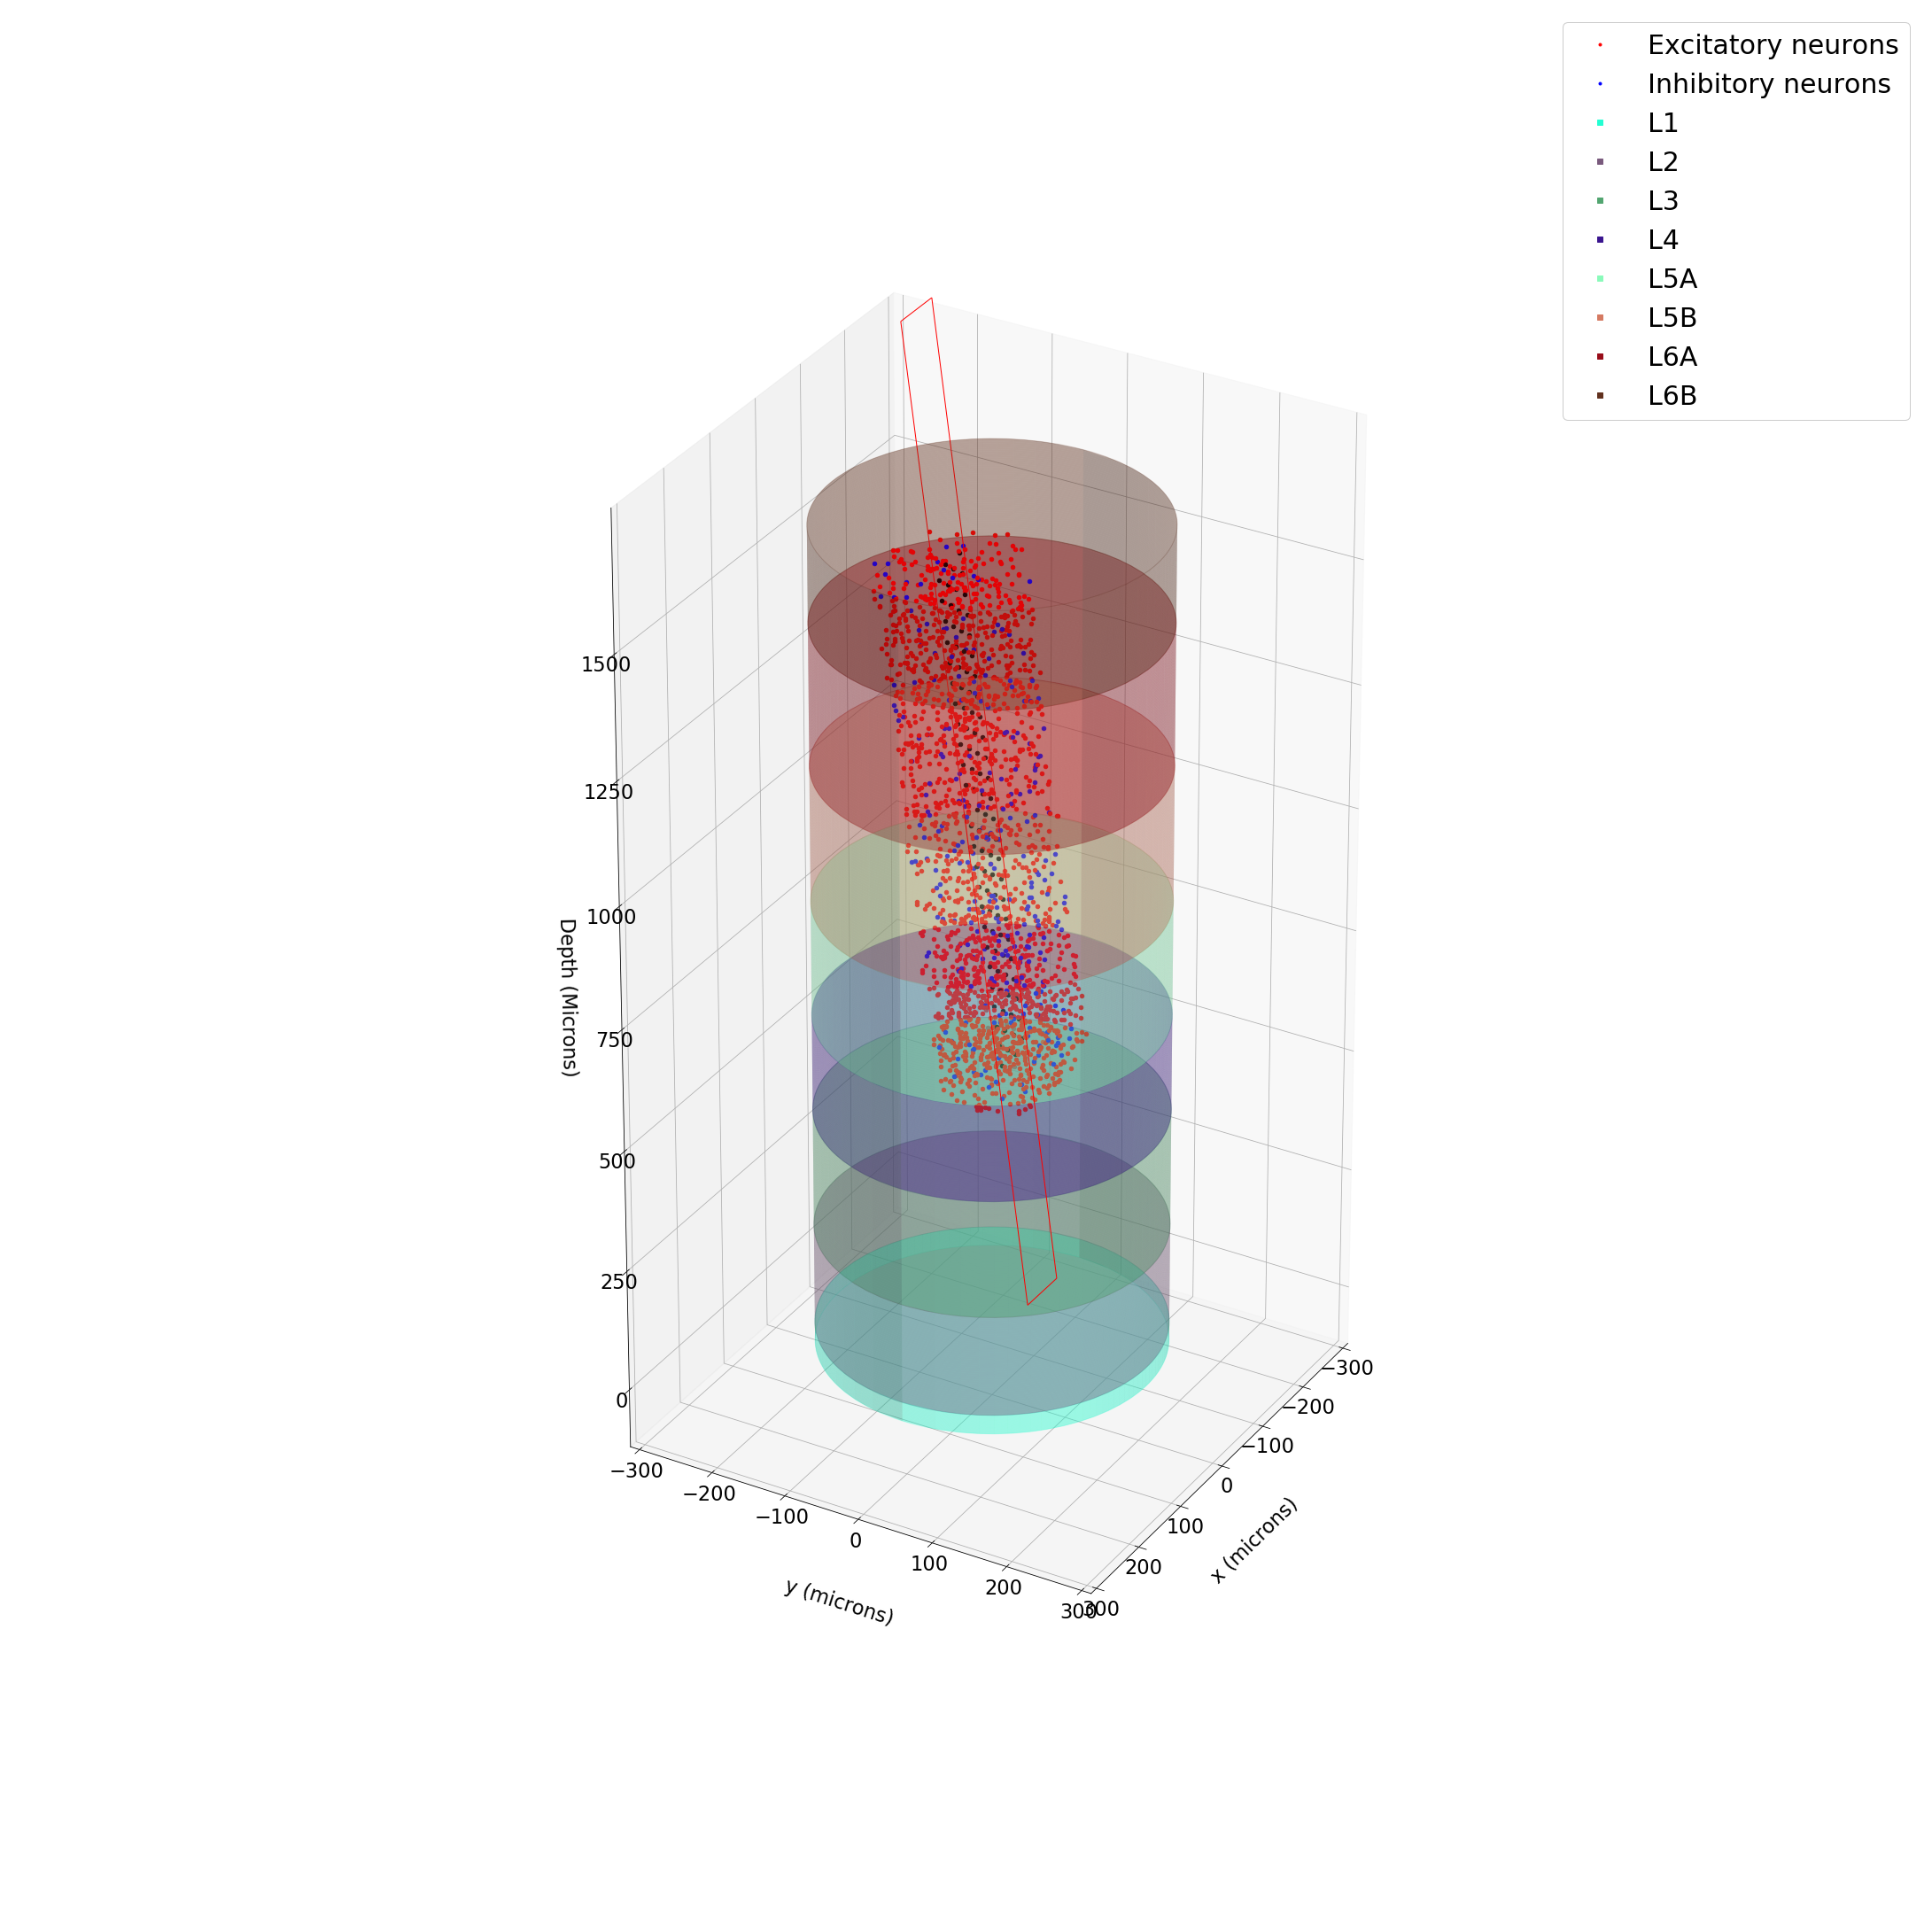

In [13]:
#Get all neurons within a radius of any channel on the array (can exclude channels)
close_neuron_df = probe.getNeuronsRadius(column.getNeurons(), radius=80.0, excluded_channel_ids=excluded_channel_ids)
print("Num neurons: " + str(close_neuron_df.shape[0]))
#Can plot the column with all neurons in the radius
fig=plt.figure(figsize=(30,30))
ax = Axes3D(fig, azim=30, elev=30)
probe.draw(ax, excluded_channel_ids=excluded_channel_ids)

column.plotColumn(close_neuron_df, plot_neurons=True, ax=ax)

## 3. All data structures needed for simulating an extracellular recording

In [14]:
#All neurons for the recording
print(close_neuron_df)

#Can get all neuron positions in numpy array
close_neuron_pos = np.asarray(list(close_neuron_df['pos'].copy()))
print(close_neuron_pos.shape)


#All channels on the probe (you can return all non-excluded channel ids)
probe_channels = probe.getChannels(excluded_channel_ids=excluded_channel_ids)
print(probe_channels)

#Can get all channel positions in numpy array
close_channels_pos = np.asarray(list(probe_channels['pos'].copy()))
print(close_channels_pos.shape)

          id                                                pos btype mtype  \
16386  16386  [-121.54926469137268, -169.02655178295007, 138...    EX   N/A   
16388  16388  [-134.78518681618704, -118.84742057885065, 126...    EX   N/A   
16389  16389  [-155.72553340620462, -90.22857437018385, 1296...    EX   N/A   
8199    8199  [-117.91527865619013, -111.01769847663026, 562...    EX   N/A   
16396  16396  [-119.58570652289578, -123.09186452289686, 136...    EX   N/A   
8205    8205  [-171.04767665588403, 7.492220750875525, 617.1...    EX   N/A   
16400  16400  [-176.00736499458404, -97.96900120542628, 1311...    EX   N/A   
8210    8210  [-117.0783319275682, -54.413253819721874, 511....    EX   N/A   
8211    8211  [-170.90488599837877, -112.42412587336203, 519...    EX   N/A   
8219    8219  [-124.6070978278813, -119.7084278394334, 642.7...    EX   N/A   
16412  16412  [-146.78249873487385, -149.4973412508436, 1193...    EX   N/A   
16414  16414  [-91.8161985510043, -53.33327897057475